In [1]:
import pandas as pd
import os
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
for root, dirs, files in os.walk(r"C:\Users\kyle.liu\q3", topdown=False):
    for name in files:
        print(os.path.join(root, name))
    for name in dirs:
        print(os.path.join(root, name))

C:\Users\kyle.liu\q3\Anzheng Fashion Group Co Ltd SHSE 603839 Financials.xls
C:\Users\kyle.liu\q3\Dazzle Fashion Co Ltd SHSE 603587 Financials.xls
C:\Users\kyle.liu\q3\Jinhong Fashion Group Co Ltd SHSE 603518 Financials.xls
C:\Users\kyle.liu\q3\Shenzhen Ellassay Fashion Co Ltd SHSE 603808 Financials.xls


In [2]:
len(files)

4

In [4]:
array = []
for i in range(len(files)):
    ####
    def grab_tables(report):
        def re_space(x):
                if x == 0:
                    x = 0
                else:
                    return x.replace(" ","_")
        figures = report[16:len(report)]
        figures = figures.dropna(axis=1,how ='all')
        figures.columns=['Subjects','2019LTM9M','2020LTM9M','2021LTM9M']
        df = figures.reset_index(drop=True)
        df = df.replace('-','0').dropna(axis=0)
        df['Subjects'] = df['Subjects'].apply(lambda x:re_space(x))
        df = df[~df.isin(['NM'])]
        df=df[~df['Subjects'].isin(['Filing_Date','Restatement_Type','Calculation_Type','Payout_Ratio_%','Effective Tax Rate %'])]
        df[['2019LTM9M','2020LTM9M','2021LTM9M']]=df[['2019LTM9M','2020LTM9M','2021LTM9M']].astype(float)
        return df
    ####
    def grab_tables2(report):
        def re_space(x):
                if x == 0:
                    x = 0
                else:
                    return x.replace(" ","_")
        figures = report[16:len(report)]
        figures = figures.dropna(axis=1,how ='all')
        figures.columns=['Subjects',
                        "Q1Mar-31-2019",
                        "Q2Jun-30-2019",
                        "2019LTM9M",#注意这里！！！
                        "Q4Dec-31-2019",
                        "Q1Mar-31-2020",
                        "Q2Jun-30-2020",
                        "2020LTM9M",
                        "Q4Dec-31-2020",
                        "Q1Mar-31-2021",
                        "Q2Jun-30-2021",
                        "2021LTM9M",
                        ]
        df = figures.reset_index(drop=True)
        df = df.replace('-','0').dropna(axis=0)
        df['Subjects'] = df['Subjects'].apply(lambda x:re_space(x))
        df=df[~df['Subjects'].isin(['Filing_Date','Restatement_Type','Calculation_Type'])]
        df[["Q1Mar-31-2019",
            "Q2Jun-30-2019",
            "2019LTM9M",
            "Q4Dec-31-2019",
            "Q1Mar-31-2020",
            "Q2Jun-30-2020",
            "2020LTM9M",
            "Q4Dec-31-2020",
            "Q1Mar-31-2021",
            "Q2Jun-30-2021",
            "2021LTM9M",
            ]]=df[["Q1Mar-31-2019",
            "Q2Jun-30-2019",
            "2019LTM9M",
            "Q4Dec-31-2019",
            "Q1Mar-31-2020",
            "Q2Jun-30-2020",
            "2020LTM9M",
            "Q4Dec-31-2020",
            "Q1Mar-31-2021",
            "Q2Jun-30-2021",
            "2021LTM9M",
            ]].astype(float)
        return df
    ####
    def grab_data(company_name,period,df):
        output = pd.DataFrame()
        output['Company'] = [company_name]
        output['Time'] = [period]
        output['Revenue'] = df.loc[df['Subjects']== 'Revenue',period].values
        output['COGS'] = df.loc[df['Subjects']== 'Cost_Of_Goods_Sold',period].values
        output['Net_Income'] = df.loc[df['Subjects']== '__Net_Income',period].values
        output['Sale_Exp'] = df.loc[df['Subjects']== 'Selling_and_Marketing_Exp.',period].values
        output['Managment_Exp'] = df.loc[df['Subjects']== 'General_and_Administrative_Exp.',period].values
        if len(df.loc[df['Subjects']== 'R&D_Exp.',period].values) == 0:
            output['Research_Exp'] = 0
        else:
            output['Research_Exp'] = df.loc[df['Subjects']== 'R&D_Exp.',period].values
        return output
    ####
    def grab_bsdata(company_name,period,df):
        output = pd.DataFrame()
        output['Company'] = [company_name]
        output['Time'] = [period]
        output['Total_Assets'] = df.loc[df['Subjects']== 'Total_Assets',period].values
        output['Total_Receivables'] = df.loc[df['Subjects']== '__Total_Receivables',period].values
        output['Inventory'] = df.loc[df['Subjects']== 'Inventory',period].values
        output['Total_Current_Assets'] = df.loc[df['Subjects']== '__Total_Current_Assets',period].values
        if  len(df.loc[df['Subjects']== 'Short-term_Borrowings',period].values) == 0:
            output['Short_term_Borrowings'] = 0
        else:
            output['Short_term_Borrowings'] = df.loc[df['Subjects']== 'Short-term_Borrowings',period].values
        output['Total_Cash_&_ST_Investments'] = df.loc[df['Subjects']== '__Total_Cash_&_ST_Investments',period].values
        output['Total_Liabilities'] = df.loc[df['Subjects']== 'Total_Liabilities',period].values
        output['__Total_Current_Liabilities'] = df.loc[df['Subjects']== '__Total_Current_Liabilities',period].values
        output['Total_Equity'] = df.loc[df['Subjects']== 'Total_Equity',period].values
        return output
######def end
######read begin
   
   
    IS = pd.read_excel(os.path.join(root, files[i]) ,sheet_name='Income Statement')
    BS = pd.read_excel(os.path.join(root, files[i]) ,sheet_name='Balance Sheet')
    #CF = pd.read_excel(os.path.join(root, files[i]) ,sheet_name='Cash Flow')
    balance_sheet = grab_tables2(BS)
    income_statement = grab_tables(IS)
    #cash_flow = grab_tables(CF)
    l =['2019LTM9M','2020LTM9M','2021LTM9M']
    
    for j in l:
        dadabs = grab_bsdata(files[i],j,balance_sheet)
        dadais = grab_data(files[i],j,income_statement)   
        dada = pd.merge(dadabs,dadais, on = ['Company','Time'])
        array.append(dada)


WARNING *** file size (196106) not 512 + multiple of sector size (512)
WARNING *** file size (196106) not 512 + multiple of sector size (512)
WARNING *** file size (189450) not 512 + multiple of sector size (512)
WARNING *** file size (189450) not 512 + multiple of sector size (512)
WARNING *** file size (190474) not 512 + multiple of sector size (512)
WARNING *** file size (190474) not 512 + multiple of sector size (512)
WARNING *** file size (199178) not 512 + multiple of sector size (512)
WARNING *** file size (199178) not 512 + multiple of sector size (512)


In [5]:
array = pd.concat(array)


In [7]:
len(array)

12

In [9]:
data9m = pd.DataFrame(array)
data9m.to_csv('data9m.csv')

In [45]:
'''''''''''
data9m['毛利率'] = (data9m['Revenue']-data9m['COGS'])/data9m['Revenue']
data9m['毛利'] = data9m['Revenue']-data9m['COGS']
data9m['營業利益率'] = data9m['Net_Income']/data9m['Revenue']


C:\Users\kyle.liu\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 27611 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\kyle.liu\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 21033 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\kyle.liu\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 29575 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\kyle.liu\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 27611 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\kyle.liu\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 21033 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\kyle.liu\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 29575 

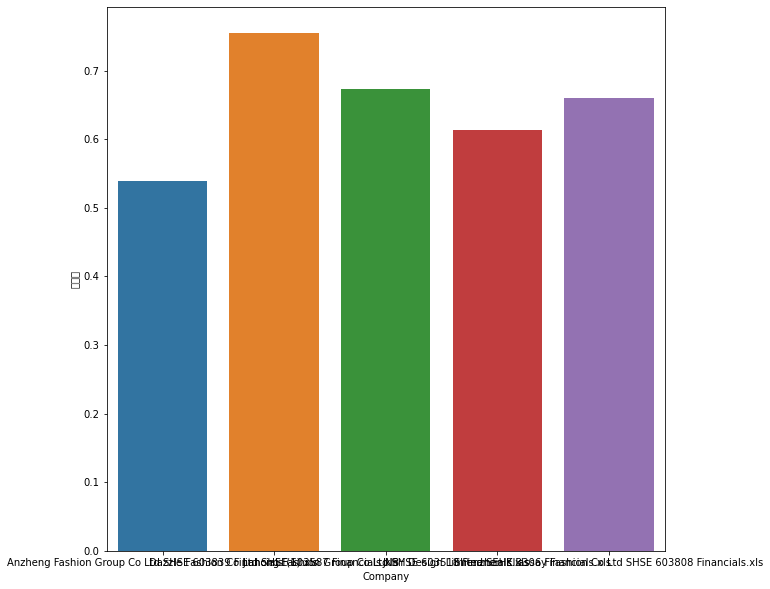

In [54]:
'''''''''
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
plot = sns.barplot(x='Company',y='毛利率',data=data9m[data9m['Time']=='2019LTM9M'])
plt.show()
''''''''''''